Columns in dataset: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Average balance by age group:
 age_group
Young          73198.764050
Middle-aged    76795.899418
Senior         79951.380071
Name: Balance, dtype: float64
Customer statistics by country:
 {'France': {'avg_balance': np.float64(62092.63651575588), 'churn_rate': np.float64(16.15476665337056)}, 'Spain': {'avg_balance': np.float64(61818.14776342349), 'churn_rate': np.float64(16.673395236172787)}, 'Germany': {'avg_balance': np.float64(119730.1161339179), 'churn_rate': np.float64(32.44320446392985)}}


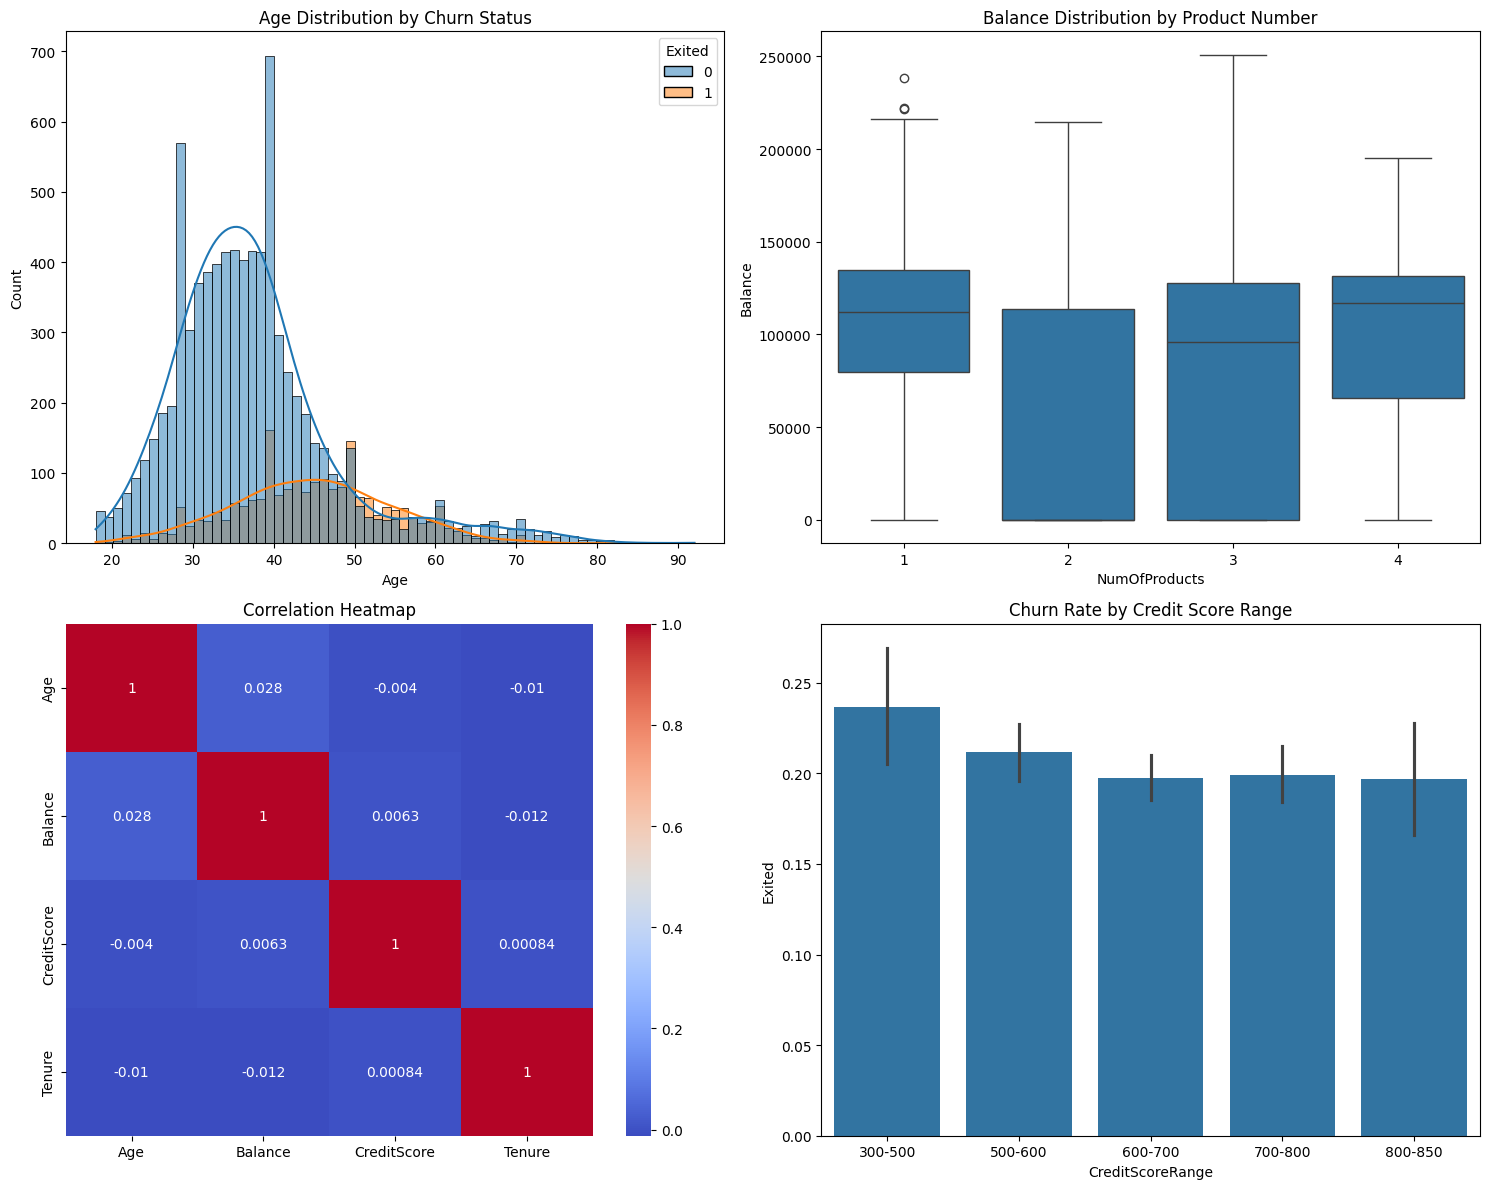

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.32      0.07      0.11       393

    accuracy                           0.79      2000
   macro avg       0.56      0.52      0.50      2000
weighted avg       0.71      0.79      0.73      2000

Confusion Matrix:
 [[1552   55]
 [ 367   26]]


In [5]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# dataset
df = pd.read_csv(r"C:\Users\donia\Downloads\Bank Customer Churn prediction\Churn_Modelling.csv")

# column names
print("Columns in dataset:", df.columns)

# Part 1: Data Loading and Basic Python Operations

# Function to calculate average balance for different age groups
def calculate_age_group_balance(df):
    bins = [0, 30, 50, np.inf]
    labels = ['Young', 'Middle-aged', 'Senior']
    df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
    return df.groupby('age_group', observed=False)['Balance'].mean()

# Calculate and display average balance by age group
age_group_balance = calculate_age_group_balance(df)
print("Average balance by age group:\n", age_group_balance)

# Part 2: Data Structure Manipulation

# Lists of churned and retained customers
churned_customers = df.loc[df['Exited'] == 1, 'CustomerId'].tolist()
retained_customers = df.loc[df['Exited'] == 0, 'CustomerId'].tolist()

# High-value customers (Balance > 100,000) using list comprehension
high_value_customers = df.loc[df['Balance'] > 100000, 'CustomerId'].tolist()

# Customer statistics by country
country_stats = {
    country: {
        'avg_balance': df.loc[df['Geography'] == country, 'Balance'].mean(),
        'churn_rate': df.loc[df['Geography'] == country, 'Exited'].mean() * 100
    }
    for country in df['Geography'].unique()
}

print("Customer statistics by country:\n", country_stats)

# Part 3: Data Cleaning and Preparation

# Function to prepare the data
def prepare_data(df):
    # Handle missing values
    df['Balance'] = df['Balance'].fillna(df['Balance'].mean())
    df['NumOfProducts'] = df['NumOfProducts'].fillna(1)  # Assuming 1 as a default product count

    # Create new features
    df['balance_per_product'] = df['Balance'] / df['NumOfProducts']
    df['is_high_value'] = df['Balance'] > df['Balance'].mean()

    # Convert categorical variables to dummy variables
    df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)

    return df

# Prepare the data
df = prepare_data(df)

# Part 4: Exploratory Data Analysis and Visualization

# Function to create visualizations
def create_visualizations(df):
    # Set up the matplotlib figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Age distribution by churn status
    sns.histplot(data=df, x='Age', hue='Exited', kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Age Distribution by Churn Status')

    # Balance distribution by number of products
    sns.boxplot(data=df, x='NumOfProducts', y='Balance', ax=axes[0, 1])
    axes[0, 1].set_title('Balance Distribution by Product Number')

    # Correlation heatmap
    numeric_cols = ['Age', 'Balance', 'CreditScore', 'Tenure']
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', ax=axes[1, 0])
    axes[1, 0].set_title('Correlation Heatmap')

    # Churn rate by credit score range
    bins = [300, 500, 600, 700, 800, 850]
    labels = ['300-500', '500-600', '600-700', '700-800', '800-850']
    df['CreditScoreRange'] = pd.cut(df['CreditScore'], bins=bins, labels=labels)
    sns.barplot(data=df, x='CreditScoreRange', y='Exited', ax=axes[1, 1])
    axes[1, 1].set_title('Churn Rate by Credit Score Range')

    plt.tight_layout()
    return fig

# Create and display visualizations
fig = create_visualizations(df)
plt.show()

# Part 5: Basic Predictive Analysis

# Prepare features and target variable
df_model = df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'is_high_value']]
y = df['Exited']

# Feature scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_model), columns=df_model.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Print classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
